In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [3]:
from skimage import img_as_float, img_as_ubyte
from PIL import Image, ImageDraw

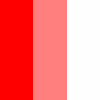

In [4]:
img1 = Image.new('RGBA', size=(100, 100), color=(255, 0, 0, 255))
draw = ImageDraw.Draw(img1)
draw.rectangle((33, 0, 66, 100), fill=(255, 0, 0, 128))
draw.rectangle((67, 0, 100, 100), fill=(255, 0, 0, 1))
img1

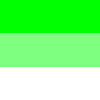

In [5]:
img2 = Image.new('RGBA', size=(100, 100), color=(0, 255, 0, 255))
draw = ImageDraw.Draw(img2)
draw.rectangle((0, 33, 100, 66), fill=(0, 255, 0, 128))
draw.rectangle((0, 67, 100, 100), fill=(0, 255, 0, 1))
img2

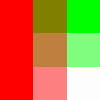

In [6]:
a = Image.alpha_composite(img2, img1)
a

In [7]:
def alpha_composite(img1, img2):
    assert img1.shape[-1] == img2.shape[-1] == 4
    rgb1, alpha1 = np.dsplit(img1, (3,))
    rgb2, alpha2 = np.dsplit(img2, (3,))
    alpha_out = alpha1 + (1. - alpha1) * alpha2
    rgb_out = (alpha1 * rgb1 + (1. - alpha1) * alpha2 * rgb2) / alpha_out
    return np.dstack((rgb_out, alpha_out))

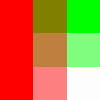

In [8]:
b = Image.fromarray(np.round(255*alpha_composite(np.asarray(img1)/255., 
                                                 np.asarray(img2)/255.)).astype('uint8'))
b

In [9]:
np.all(np.asarray(a)==np.asarray(b))

True

/Users/tiao/.virtualenvs/recomposed/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


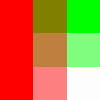

In [10]:
b = Image.fromarray(img_as_ubyte(
        alpha_composite(img_as_float(img1), img_as_float(img2))))
b

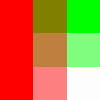

In [11]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    b = Image.fromarray(img_as_ubyte(
            alpha_composite(img_as_float(img1), img_as_float(img2))))
b

In [12]:
np.all(np.asarray(a)==np.asarray(b))

True

In [13]:
def func_as_ubyte(func):

    def new_func(*args): 

        new_args = map(img_as_float, args)
        ret = func(*new_args)
        
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            return img_as_ubyte(ret)

    return new_func

In [14]:
def return_image_from_array(func):
    
    def new_func(*args, **kwargs):
        return Image.fromarray(func(*args, **kwargs))

    return new_func

In [15]:
@return_image_from_array
@func_as_ubyte
def alpha_composite(img1, img2):
    assert img1.shape[-1] == img2.shape[-1] == 4
    rgb1, alpha1 = np.dsplit(img1, (3,))
    rgb2, alpha2 = np.dsplit(img2, (3,))
    alpha_out = alpha1 + (1. - alpha1) * alpha2
    rgb_out = (alpha1 * rgb1 + (1. - alpha1) * alpha2 * rgb2) / alpha_out
    return np.dstack((rgb_out, alpha_out))

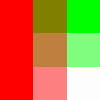

In [16]:
b = alpha_composite(img1, img2)
b

In [17]:
np.all(np.asarray(a)==np.asarray(b))

True